In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# csv 파일 불러오기
df = pd.read_csv('namu.csv', encoding='utf-8-sig', index_col=0)
df.head(2)

,Title,Category,Content
0,한양대학교/서울캠퍼스/학부/공과대학,한양대학교,한양대학교 공과대학\n漢陽大學校 工科大學\nHanyang University Col...
1,숨고,애플리케이션,숨고는 여러분들이 도움을 필요로 하는 일을 도와줄 고수를 무료로 빠르게 찾아드려요....


In [3]:
# 텍스트 글자 전처리 : 한글 이외 모든 문자 제거
# 정규표현식
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅎ가-힣]') # [^ ㄱ-ㅎ가-힣] 와 [^ㄱ-ㅎ가-힣]가 차이 있음 ==> 띄어쓰기 
    # [0-9a-zA-Z], [ㄱ-ㅎ가-힣], 
    # ^[a]{1}: ^는 첫시작을 의미 ==> 첫글자가 a로 시작하는지
    # [^a] : [^ ]는 not의 의미 ==> a가 아닌 것을 찾아라
    result = hangul.sub('',text)
    return result


In [4]:
text_cleaning(df['Content'][0])

'한양대학교 공과대학     출범년 동아공과학원 설립학장김찬형선봉공대링크한양대학교 공과대학 홈페이지한양대학교 서울캠퍼스의 공과대학에 대해 정리한 문서타 대학은 일반적으로 문과대학이 학교 홈페이지 내의 학과 소개란 가장 앞에 오는 반면에 한양대 서울은 공과대학이 학과 소개의 제일 앞에 위치하고 있다 이는 한양대학교가 동아공과학원에서 시작하여 공대가 역사적 뿌리이기 때문이다 여러모로 한양대학교가 공대를 어떻게 생각하는지 보여주는 부분이하의 개설 학과 목록은 한양대학교 공과대학 공식 사이트에 나오는 순서대로 나열한 것이다한양대학교 공과대학공과대학소프트웨어대학반도체공학과건축학부건축공학부건설환경공학과도시공학과자원환경공학과융합전자공학부전기생체공학부 전기공학전공 바이오메디컬공학전공신소재공학부화학공학과생명공학과유기나노공학과에너지공학과기계공학부원자력공학과산업공학과데이터사이언스학부 데이터사이언스전공 심리뇌과학전공컴퓨터소프트웨어학부정보시스템학과미래자동차공학과'

In [5]:
# 각 컬럼별 전처리 작업
df['Title'] = df['Title'].apply(lambda x : text_cleaning(x))

In [6]:
df['Category'] = df['Category'].apply(lambda x : text_cleaning(x))
df['Content'] = df['Content'].apply(lambda x : text_cleaning(x))


In [7]:
df.head()

,Title,Category,Content
0,한양대학교서울캠퍼스학부공과대학,한양대학교,한양대학교 공과대학 출범년 동아공과학원 설립학장김찬형선봉공대링크한양대학교 공...
1,숨고,애플리케이션,숨고는 여러분들이 도움을 필요로 하는 일을 도와줄 고수를 무료로 빠르게 찾아드려요숨...
2,트로페오 알프레도 디 스테파노,축구상,년 스페인의 언론사인 마르카에서 선정하기 시작한 상으로 마르카가 선정하는 라리가 올...
3,김용철,대한민국의 검사 출신 변호사,대한민국의 검사 출신 변호사삼성그룹의 비자금 운용을 폭로한 것으로 유명하다 한동안 ...
4,강형욱 직장 내 괴롭힘 폭로 논란전개,경과,같은 날 사건반장에서 해당 논란에 대해 보도했는데 여기에서 년 한 직원에게 퇴사 ...


In [8]:
df['Title'].to_list()

['한양대학교서울캠퍼스학부공과대학',
 '숨고',
 '트로페오 알프레도 디 스테파노',
 '김용철',
 '강형욱 직장 내 괴롭힘 폭로 논란전개',
 '아산 짜증나요 수원이기고 부천에게 지나요',
 '포홍',
 '갈바트론트랜스포머 시네마틱 유니버스',
 '캣니스 에버딘',
 '작은 거인하이큐',
 '후생노동성',
 '사쿠라자카굿즈생사진',
 '페이퍼 마리오 년의 문',
 '틀빛나는 별',
 '아컴호러 카드게임플레이어 카드인스머스에 드리운 음모',
 '숨고',
 '진해성',
 '갈바트론트랜스포머 시네마틱 유니버스',
 '손승익',
 '한양대학교서울캠퍼스학부공과대학',
 '공산주의',
 '숨고',
 '라리가 어워즈',
 '기라',
 '조폭인 내가 고등학생이 되었습니다드라마',
 '갈바트론트랜스포머 시네마틱 유니버스',
 '인사이드 아웃',
 '윤종용',
 '마테이스 더리흐트',
 '진해성',
 '우르갈',
 '화성시 갑',
 '정하에코하임',
 '알렉스 베시아선수 경력',
 '김승현 안피디의 스포일러',
 '틀빛나는 별',
 '갈바트론트랜스포머 시네마틱 유니버스',
 '홍천군',
 '에픽세븐영웅',
 '옹알이',
 '해신 요시노 준페이',
 '손승익',
 '슈퍼 마리오 오디세이등장인물',
 '조폭인 내가 고등학생이 되었습니다드라마',
 '틀영국군원수',
 '육조류 생물 목록',
 '비토리아 세레티',
 ' 이벤트아크틱 서머 월드 칼데아 한여름의 마원관광',
 '진해성',
 ' 애니메이티드 유니버스']

In [9]:
test_list = ['aaa', 'bbb', 'ccc']
"".join(test_list)

'aaabbbccc'

In [10]:
title_corp = " ".join(df['Title'].to_list())
title_corp

'한양대학교서울캠퍼스학부공과대학 숨고 트로페오 알프레도 디 스테파노 김용철 강형욱 직장 내 괴롭힘 폭로 논란전개 아산 짜증나요 수원이기고 부천에게 지나요 포홍 갈바트론트랜스포머 시네마틱 유니버스 캣니스 에버딘 작은 거인하이큐 후생노동성 사쿠라자카굿즈생사진 페이퍼 마리오 년의 문 틀빛나는 별 아컴호러 카드게임플레이어 카드인스머스에 드리운 음모 숨고 진해성 갈바트론트랜스포머 시네마틱 유니버스 손승익 한양대학교서울캠퍼스학부공과대학 공산주의 숨고 라리가 어워즈 기라 조폭인 내가 고등학생이 되었습니다드라마 갈바트론트랜스포머 시네마틱 유니버스 인사이드 아웃 윤종용 마테이스 더리흐트 진해성 우르갈 화성시 갑 정하에코하임 알렉스 베시아선수 경력 김승현 안피디의 스포일러 틀빛나는 별 갈바트론트랜스포머 시네마틱 유니버스 홍천군 에픽세븐영웅 옹알이 해신 요시노 준페이 손승익 슈퍼 마리오 오디세이등장인물 조폭인 내가 고등학생이 되었습니다드라마 틀영국군원수 육조류 생물 목록 비토리아 세레티  이벤트아크틱 서머 월드 칼데아 한여름의 마원관광 진해성  애니메이티드 유니버스'

In [11]:
category_corp = " ".join(df['Category'].to_list())
content_corp = ' '.join(df['Content'].to_numpy())

In [12]:
content_corp

'한양대학교 공과대학     출범년 동아공과학원 설립학장김찬형선봉공대링크한양대학교 공과대학 홈페이지한양대학교 서울캠퍼스의 공과대학에 대해 정리한 문서타 대학은 일반적으로 문과대학이 학교 홈페이지 내의 학과 소개란 가장 앞에 오는 반면에 한양대 서울은 공과대학이 학과 소개의 제일 앞에 위치하고 있다 이는 한양대학교가 동아공과학원에서 시작하여 공대가 역사적 뿌리이기 때문이다 여러모로 한양대학교가 공대를 어떻게 생각하는지 보여주는 부분이하의 개설 학과 목록은 한양대학교 공과대학 공식 사이트에 나오는 순서대로 나열한 것이다한양대학교 공과대학공과대학소프트웨어대학반도체공학과건축학부건축공학부건설환경공학과도시공학과자원환경공학과융합전자공학부전기생체공학부 전기공학전공 바이오메디컬공학전공신소재공학부화학공학과생명공학과유기나노공학과에너지공학과기계공학부원자력공학과산업공학과데이터사이언스학부 데이터사이언스전공 심리뇌과학전공컴퓨터소프트웨어학부정보시스템학과미래자동차공학과 숨고는 여러분들이 도움을 필요로 하는 일을 도와줄 고수를 무료로 빠르게 찾아드려요숨은 고수의 준말 숨고는 주브레이브모바일에서 년부터 서비스 중인 전문가 매칭 서비스 플랫폼이다 숨고는 홈페이지 혹은 어플리케이션으로 접속하여 간단한 요청서를 작성하면 숨은 고수전문가들 다수의 고수에게 견적서를 각각 받아 고수를 비교 선택할 수 있다요청자의 입장에서는 필요한 서비스를 요청할 수 있으며 고수의 입장에서는 소비자를 만날 수 있는 시장으로 활용할 수 있다는 것이 업체의 설명이지만 하술의 이유로 비난을 받고 있다 자세한 내용은 논란 및 유저 이탈 참고 년 스페인의 언론사인 마르카에서 선정하기 시작한 상으로 마르카가 선정하는 라리가 올해의 선수 상이라고 할 수 있다 해당 시즌 라리가 최고의 축구 선수에게 수여되는 상이다 흔히 디 스테파노 상이라고 불리며 스페인의 전설적인 공격수인 알프레도 디 스테파노에서 유래되었다라리가 어워즈가 년을 끝으로 폐지되면서 실질적인 라리가 올해의 선수상의 위상을 가지게 되었다라리가와 라리가  두 리그를 각각 나누

In [13]:
from konlpy.tag import Okt
from collections import Counter

In [14]:
# 명사 단위 키워드 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corp)

In [15]:
# 출현 빈도수 확인
Counter(nouns)

Counter({'년': 31,
         '수': 27,
         '것': 26,
         '토큰': 26,
         '국가': 18,
         '학교': 17,
         '학과': 16,
         '시작': 16,
         '이': 16,
         '트랜스포머': 16,
         '고수': 15,
         '공과대학': 14,
         '이후': 13,
         '주장': 13,
         '학부': 12,
         '라리가': 12,
         '트롯': 12,
         '공산주의': 12,
         '선수': 11,
         '등': 11,
         '사회': 11,
         '때문': 10,
         '통해': 10,
         '중': 10,
         '노동자': 10,
         '작품': 10,
         '혼돈': 10,
         '문서': 9,
         '서비스': 9,
         '대한민국': 9,
         '말': 9,
         '시리즈': 9,
         '주의': 9,
         '카드': 9,
         '저주': 9,
         '능력': 9,
         '픽사': 9,
         '월': 9,
         '대학': 8,
         '일': 8,
         '후': 8,
         '인조': 8,
         '한국': 8,
         '홈페이지': 7,
         '가장': 7,
         '존재': 7,
         '일본': 7,
         '그': 7,
         '축복': 7,
         '출연': 7,
         '지배': 7,
         '계급': 7,
         '생각': 6,
         '전문가':

In [16]:
nouns

['학교',
 '공과대학',
 '출범',
 '년',
 '동아',
 '공과',
 '학원',
 '설립',
 '학장',
 '김찬',
 '선봉',
 '링크',
 '학교',
 '공과대학',
 '홈페이지',
 '학교',
 '캠퍼스',
 '공과대학',
 '대해',
 '정리',
 '문서',
 '타',
 '대학',
 '일반',
 '문과',
 '대학',
 '학교',
 '홈페이지',
 '내의',
 '학과',
 '소개',
 '란',
 '가장',
 '앞',
 '반면',
 '한양대',
 '서울',
 '공과대학',
 '학과',
 '소개',
 '제일',
 '앞',
 '위치',
 '학교',
 '동아',
 '과학',
 '시작',
 '공대',
 '역사',
 '뿌리',
 '이기',
 '때문',
 '모로',
 '학교',
 '공대',
 '생각',
 '부분',
 '이하',
 '개설',
 '학과',
 '목록',
 '학교',
 '공과대학',
 '공식',
 '사이트',
 '순서대로',
 '것',
 '학교',
 '공과대학',
 '공과대학',
 '소프트웨어',
 '대학',
 '반도체',
 '학과',
 '건축',
 '학부',
 '건축',
 '학부',
 '건설',
 '환경공학',
 '도시공학',
 '과자',
 '환경공학',
 '융합',
 '전자공학',
 '부',
 '전기',
 '생체',
 '학부',
 '전기공학',
 '전공',
 '바이오',
 '컬',
 '공학',
 '신소재공학',
 '부',
 '화학공학',
 '생명공학',
 '유기',
 '나노',
 '학과',
 '에너지공학',
 '기계공',
 '학부',
 '원자력공학',
 '산업',
 '학과',
 '데이터',
 '사이언스',
 '학부',
 '데이터',
 '사이언스',
 '전공',
 '심리',
 '뇌',
 '과학',
 '컴퓨터',
 '소프트웨어',
 '학부',
 '정보',
 '시스템',
 '학과',
 '미래',
 '자동차',
 '학과',
 '여러분',
 '도움',
 '필요',
 '일',
 '고수',
 '무료',
 '고수',
 '준말',
 '브레이브',
 '모바일'

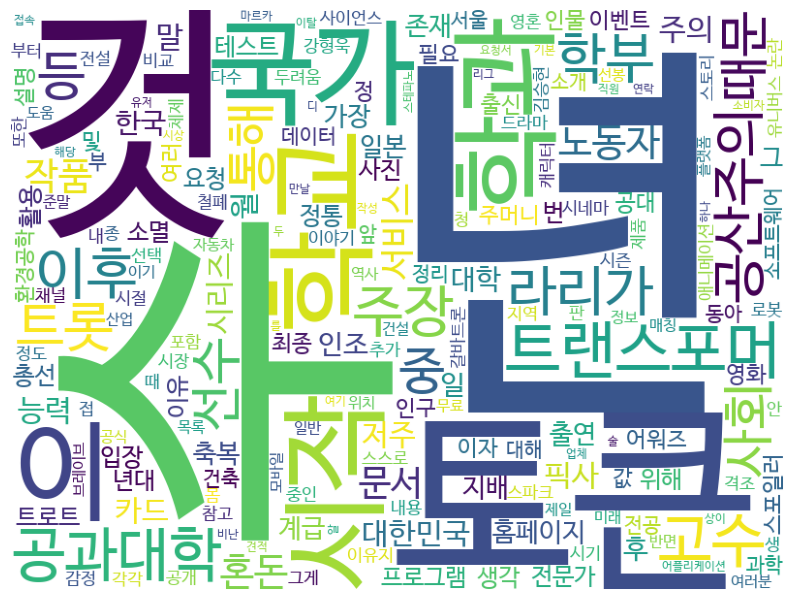

In [17]:
# test code
count = Counter(nouns)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '../m0528/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(count))
plt.figure(figsize=(10,8))
plt.axis('off') # 눈금없애기
plt.imshow(cloud)